#### Загрузим данные

In [8]:
import pandas as pd
import markdown as md
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Laptop-Price.csv')
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Unnamed: 16,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,NaN,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,NaN,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,NaN,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,NaN,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,NaN,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,NaN,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,NaN,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,NaN,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,NaN,1499.00


Сразу проверим пропуски и размер датафрейма

#### Количество строк и столбцов в исходном датафрейме

In [9]:
r,c = df.shape
print(f'количество строк = {r}; количество столбцов = {c}')

количество строк = 1146; количество столбцов = 18


#### Пропуски

In [10]:
df.isna().sum() #кол-во пропусков

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Ram,0
OpSys,0
Cpu Brand,0
Cpu Model,0
Cpu Rate,0


Как мы видим, предпоследний столбец пустой, поэтому мы его удалим

In [11]:
# Удаляю ошибочный столбик (Unnamed: 16	)
df.drop('Unnamed: 16', axis=1, inplace=True)
df

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8GB,No OS,Intel,Core i5 7200U,2.5GHz,256,0,0,0,Intel,HD Graphics 620,575.00
1,Acer,Aspire 3,Notebook,15.6,1366x768,4GB,Windows 10,AMD,A9-Series 9420,3GHz,0,500,0,0,AMD,Radeon R5,400.00
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16GB,Windows 10,Intel,Core i7 8550U,1.8GHz,512,0,0,0,Nvidia,GeForce MX150,1495.00
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8GB,Windows 10,Intel,Core i5 8250U,1.6GHz,256,0,0,0,Intel,UHD Graphics 620,770.00
4,HP,250 G6,Notebook,15.6,1366x768,4GB,No OS,Intel,Core i5 7200U,2.5GHz,0,500,0,0,Intel,HD Graphics 620,393.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,1366x768,8GB,Linux,Intel,Core i7 7500U,2.7GHz,0,1,0,0,AMD,Radeon R5 M430,805.99
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,0,500,0,0,Nvidia,GeForce 920M,720.32
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Windows 10,Intel,Core i7 6500U,2.5GHz,128,0,0,0,Intel,HD Graphics 520,638.00
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Windows 10,Intel,Core i7 6500U,2.5GHz,512,0,0,0,Intel,HD Graphics 520,1499.00


Теперь пропусков нет, можно проболжить обработку данных

# Разведочный анализ данных

### Описание исходных признаков

In [12]:
df.dtypes # узнаем типы признаков

,0
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Ram,object
OpSys,object
Cpu Brand,object
Cpu Model,object
Cpu Rate,object


##### Описание признаков:
- **Company** - производитель ноутбука (номинальный)
- **Product** - название ноутбука (номинальный)
- **TypeName** - тип ноутбука (номинальный)
- **Inches** - размер экрана в дюймах (числовой, непрерывный)
- **ScreenResolution** - разрешение экрана (номинальный)
- **Ram** - объем оперативной памяти (номинальный)
- **OpSys** - операционная система (номинальный)
- **Cpu Brand** - бренд процессора (номинальный)
- **Cpu Model** - конкретная модель процессора (номинальный)
- **Cpu Rate** - частота процессора (номинальный)
- **SSD** - объем трердотельного накопителя в Гб (числовой, дискретный)
- **HDD** - объем жесткого диска в Гб (числовой, дискретный)
- **Flash Storage** - объем допольнительной флэш-памяти (числовой, дискретный)
- **Hybrid** - объем гибритного накопителя (числовой, дискретный)
- **Gpu Brand** - бренд граффического процессора (номинальный)
- **Gpu Model** - конкретная модель графического процессора (номинальный)
- **Price_euros** - цена ноутбука в € (числовой, непрерывный)

### Формат данных

Отредактируем наши данные, чтобы в дальнейшем нам было проще с ними работать

Признаки 'Ram' и 'Cpu Rate' являются числовыми, но отображаются как текстовые из-за единиц измерения.

In [13]:
# Убираю единицы измерения
df['Cpu Rate'] = df['Cpu Rate'].str.replace("GHz", "").astype(float)
df['Ram'] =  df['Ram'].str.replace("GB", "").astype(int)

In [14]:
# Проверка
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
ScreenResolution,object
Ram,int64
OpSys,object
Cpu Brand,object
Cpu Model,object
Cpu Rate,float64


Переделаем признак ScreenResolution таким образом, чтобы было видно только числовое разрешение экрана

In [15]:
df['ScreenResolution_formatted'] = df['ScreenResolution'].str.replace(r'[^0-9x]', '', regex=True)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,575.0,1920x1080
1,Acer,Aspire 3,Notebook,15.6,1366x768,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,0,0,AMD,Radeon R5,400.0,1366x768
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,0,0,Nvidia,GeForce MX150,1495.0,1920x1080
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8,Windows 10,Intel,Core i5 8250U,1.6,256,0,0,0,Intel,UHD Graphics 620,770.0,1920x1080
4,HP,250 G6,Notebook,15.6,1366x768,4,No OS,Intel,Core i5 7200U,2.5,0,500,0,0,Intel,HD Graphics 620,393.9,1366x768


Чтобы посмотреть на зависимость разрешения экрана и цены в дальнейшем - разделим столбец ScreenResolution_formatted на 2 части и узнаем произведение этих частей

In [16]:
df['ScreenResolution_pro'] = df['ScreenResolution_formatted'].str.split('x').str[0].str.strip().astype(int) * df['ScreenResolution_formatted'].str.split('x').str[1].str.strip().astype(int)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted,ScreenResolution_pro
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,575.0,1920x1080,2073600
1,Acer,Aspire 3,Notebook,15.6,1366x768,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,0,0,AMD,Radeon R5,400.0,1366x768,1049088
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,0,0,Nvidia,GeForce MX150,1495.0,1920x1080,2073600
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8,Windows 10,Intel,Core i5 8250U,1.6,256,0,0,0,Intel,UHD Graphics 620,770.0,1920x1080,2073600
4,HP,250 G6,Notebook,15.6,1366x768,4,No OS,Intel,Core i5 7200U,2.5,0,500,0,0,Intel,HD Graphics 620,393.9,1366x768,1049088


Рассмотрим признаки SSD и HDD: узнаем общий объем памяти на устройсте и создадим столбец, отвечающий за тип накопителя (0 = HDD, 1 = SSD, 2 = HDD+SSD)\
Т.к. SSD и HDD оба отвечают за объем памяти, мы хотим узнать общий объем (т.к., вероятно, чем он больше, тем выше цена устройства), а также понять, какой тип накопителя используется, т.к. накопители SSD обычно дороже накопителей HDD, поэтому тип также будет влиять на цену.

In [17]:
# общий объем памяти:
df['SSD_and_HDD'] = df['SSD'] + df['HDD']

# функция для определения типа накопителя
def BIN(x, y):
    if x == 0 and y > 0:
        return 0
    elif x > 0 and y == 0:
        return 1
    else:
        return 2

# применяем функцию 'BIN' к соответствующим столбцам
df['SSD_or_HDD'] = df.apply(lambda row: BIN(row['SSD'], row['HDD']), axis=1)
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,...,HDD,Flash Storage,Hybrid,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted,ScreenResolution_pro,SSD_and_HDD,SSD_or_HDD
0,HP,250 G6,Notebook,15.6,Full HD 1920x1080,8,No OS,Intel,Core i5 7200U,2.5,...,0,0,0,Intel,HD Graphics 620,575.0,1920x1080,2073600,256,1
1,Acer,Aspire 3,Notebook,15.6,1366x768,4,Windows 10,AMD,A9-Series 9420,3.0,...,500,0,0,AMD,Radeon R5,400.0,1366x768,1049088,500,0
2,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,16,Windows 10,Intel,Core i7 8550U,1.8,...,0,0,0,Nvidia,GeForce MX150,1495.0,1920x1080,2073600,512,1
3,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,8,Windows 10,Intel,Core i5 8250U,1.6,...,0,0,0,Intel,UHD Graphics 620,770.0,1920x1080,2073600,256,1
4,HP,250 G6,Notebook,15.6,1366x768,4,No OS,Intel,Core i5 7200U,2.5,...,500,0,0,Intel,HD Graphics 620,393.9,1366x768,1049088,500,0


На всякий случай еще раз проверим пропуски

In [18]:
df.isna().sum() #кол-во пропусков(их нет)

,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Ram,0
OpSys,0
Cpu Brand,0
Cpu Model,0
Cpu Rate,0


Разберем соотношения признаков данных и обработаем

**Company**

In [19]:
df['Company'].value_counts()

,count
Company,
Dell,284
Lenovo,267
HP,252
Asus,126
Acer,77
MSI,54
Toshiba,47
Razer,7
Samsung,7


**Product**

In [20]:
df['Product'].value_counts() # Названия практически все разные

,count
Product,
XPS 13,30
Inspiron 3567,29
Legion Y520-15IKBN,19
Vostro 3568,19
ProBook 450,18
...,...
15-bw007nv (A10-9620P/6GB/128GB/Radeon,1
17-X047na (i3-6006U/8GB/1TB/W10),1
Zenbook UX430UA,1


**TypeName**

In [21]:
df['TypeName'].value_counts() #График

,count
TypeName,
Notebook,626
Gaming,204
Ultrabook,177
2 in 1 Convertible,105
Workstation,28
Netbook,6


**Inches**

In [22]:
df['Inches'].value_counts().sort_index()

,count
Inches,
11.3,1
11.6,1
12.0,4
12.3,3
12.5,38
13.0,2
13.3,149
13.5,5
13.9,6


**ScreenResolution**

In [23]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,494
IPS Panel Full HD 1920x1080,223
1366x768,186
IPS Panel Full HD / Touchscreen 1920x1080,51
Full HD / Touchscreen 1920x1080,46
1600x900,22
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160,11


In [24]:
# ScreenResolution можно удалить, т.к. у нас уже есть новый признак с более понятными данными
df.drop('ScreenResolution', axis=1, inplace=True)

**Ram**

In [25]:
df['Ram'].value_counts().sort_index()

,count
Ram,
4,266
6,40
8,600
12,25
16,195
24,3
32,16
64,1


**OpSys**

In [26]:
df['OpSys'].value_counts() #График

,count
OpSys,
Windows 10,980
No OS,57
Linux,51
Windows 7,44
Windows 10 S,6
Chrome OS,4
Mac OS X,4


**Cpu Brand**

In [27]:
df['Cpu Brand'].value_counts() # Практически один Intel, но мы очень не хотим его удалять, но обратим на это внимание #График

,count
Cpu Brand,
Intel,1088
AMD,58


In [28]:
# Для него создадим бинарный столбец, где Intel - 0 и AMD - 1
df['Cpu Brand_bin'] = df['Cpu Brand'].apply(lambda x: 0 if x == "Intel" else 1)

**Cpu Model**

In [29]:
df['Cpu Model'].value_counts() # Здесь тоже много вариаций

,count
Cpu Model,
Core i5 7200U,193
Core i7 7700HQ,147
Core i7 7500U,135
Core i3 6006U,81
Core i7 8550U,73
...,...
Core i5 6440HQ,1
Xeon E3-1535M v6,1
Core M 7Y30,1


**Cpu Rate**

In [30]:
df['Cpu Rate'].value_counts().sort_index()

,count
Cpu Rate,
0.90,3
1.00,1
1.10,3
1.20,14
1.30,5
1.50,2
1.60,72
1.80,76
1.90,1


**Flash Storage**

In [31]:
df['Flash Storage'].value_counts() # Столбец можно удалить, так как совершенно не равномерное распределение данных

,count
Flash Storage,
0,1138
256,4
64,2
512,2


In [32]:
df.drop('Flash Storage', axis=1, inplace=True)

**Hybrid**

In [33]:
df['Hybrid'].value_counts() # Столбец также можно удалить, так как совершенно не равномерное распределение данных

,count
Hybrid,
0,1134
10,11
508,1


In [34]:
df.drop('Hybrid', axis=1, inplace=True)

**Gpu Brand**

In [35]:
df['Gpu Brand'].value_counts() #График

,count
Gpu Brand,
Intel,578
Nvidia,395
AMD,173


**Gpu Model**

In [36]:
df['Gpu Model'].value_counts()

,count
Gpu Model,
HD Graphics 620,281
HD Graphics 520,185
UHD Graphics 620,67
GeForce GTX 1050,66
GeForce GTX 1060,48
...,...
Radeon RX 560,1
Radeon 540,1
GeForce GTX 1070M,1


**SSD**

In [37]:
df['SSD'].value_counts().sort_index()

,count
SSD,
0,340
1,16
8,1
64,1
128,159
180,5
240,1
256,490
512,133


**HDD**

In [38]:
df['HDD'].value_counts().sort_index()

,count
HDD,
0,623
1,386
2,29
10,1
32,1
128,1
500,105


**ScreenResolution_formatted**

In [39]:
df['ScreenResolution_formatted'].value_counts() # график

,count
ScreenResolution_formatted,
1920x1080,816
1366x768,201
43840x2160,43
3200x1800,26
2560x1440,23
1600x900,22
2256x1504,5
2304x1440,4
2400x1600,3


**ScreenResolution_pro**

In [40]:
df['ScreenResolution_pro'].value_counts().sort_index()

,count
ScreenResolution_pro,
1049088,201
1440000,22
2073600,816
2304000,1
3110400,2
3317760,4
3393024,5
3686400,23
3840000,3


**SSD_and_HDD**

In [41]:
df['SSD_and_HDD'].value_counts().sort_index()

,count
SSD_and_HDD,
0,17
1,217
2,16
8,1
10,1
32,1
64,1
128,64
129,94


**SSD_or_HDD**

In [42]:
df['SSD_or_HDD'].value_counts().sort_index() #График

,count
SSD_or_HDD,
0,323
1,606
2,217


In [43]:
#После добавления столбцов проверим типы данных
df.dtypes

,0
Company,object
Product,object
TypeName,object
Inches,float64
Ram,int64
OpSys,object
Cpu Brand,object
Cpu Model,object
Cpu Rate,float64
SSD,int64


##### Удалим дубликаты

In [44]:
df.drop_duplicates().head()

,Company,Product,TypeName,Inches,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted,ScreenResolution_pro,SSD_and_HDD,SSD_or_HDD,Cpu Brand_bin
0,HP,250 G6,Notebook,15.6,8,No OS,Intel,Core i5 7200U,2.5,256,0,Intel,HD Graphics 620,575.0,1920x1080,2073600,256,1,0
1,Acer,Aspire 3,Notebook,15.6,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,AMD,Radeon R5,400.0,1366x768,1049088,500,0,1
2,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,Nvidia,GeForce MX150,1495.0,1920x1080,2073600,512,1,0
3,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,Intel,Core i5 8250U,1.6,256,0,Intel,UHD Graphics 620,770.0,1920x1080,2073600,256,1,0
4,HP,250 G6,Notebook,15.6,4,No OS,Intel,Core i5 7200U,2.5,0,500,Intel,HD Graphics 620,393.9,1366x768,1049088,500,0,0


### Описание итоговых признаков

In [45]:
df

,Company,Product,TypeName,Inches,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted,ScreenResolution_pro,SSD_and_HDD,SSD_or_HDD,Cpu Brand_bin
0,HP,250 G6,Notebook,15.6,8,No OS,Intel,Core i5 7200U,2.5,256,0,Intel,HD Graphics 620,575.00,1920x1080,2073600,256,1,0
1,Acer,Aspire 3,Notebook,15.6,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,AMD,Radeon R5,400.00,1366x768,1049088,500,0,1
2,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,Nvidia,GeForce MX150,1495.00,1920x1080,2073600,512,1,0
3,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,Intel,Core i5 8250U,1.6,256,0,Intel,UHD Graphics 620,770.00,1920x1080,2073600,256,1,0
4,HP,250 G6,Notebook,15.6,4,No OS,Intel,Core i5 7200U,2.5,0,500,Intel,HD Graphics 620,393.90,1366x768,1049088,500,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,8,Linux,Intel,Core i7 7500U,2.7,0,1,AMD,Radeon R5 M430,805.99,1366x768,1049088,1,0,0
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,4,Windows 10,Intel,Core i7 6500U,2.5,0,500,Nvidia,GeForce 920M,720.32,1366x768,1049088,500,0,0
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,Intel,Core i7 6500U,2.5,128,0,Intel,HD Graphics 520,638.00,1920x1080,2073600,128,1,0
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,Intel,Core i7 6500U,2.5,512,0,Intel,HD Graphics 520,1499.00,3200x1800,5760000,512,1,0


In [46]:
# Количество строк и столбцов
r,c = df.shape
print(f'количество строк = {r}; количество столбцов = {c}')

количество строк = 1146; количество столбцов = 19


##### Описание признаков:
- **Company** - производитель ноутбука (номинальный)
- **Product** - название ноутбука (номинальный)
- **TypeName** - тип ноутбука (номинальный)
- **Inches** - размер экрана в дюймах (числовой, непрерывный)
- **Ram** - объем оперативной памяти (числовой, дискретный)
- **OpSys** - операционная система (номинальный)
- **Cpu Brand** - бренд процессора (номинальный)
- **Cpu Model** - конкретная модель процессора (номинальный)
- **Cpu Rate** - частота процессора (числовой, непрерывный)
- **SSD** - объем трердотельного накопителя в Гб (числовой, дискретный)
- **HDD** - объем жесткого диска в Гб (числовой, дискретный)
- **Gpu Brand** - бренд граффического процессора (номинальный)
- **Gpu Model** - конкретная модель графического процессора (номинальный)
- **Price_euros** - цена ноутбука в € (числовой, непрерывный)
- **ScreenResolution_formatted** - числовое разрешение экрана (номинальный)
- **ScreenResolution_pro** - произведение резрешения экрана (числовой, дискретный)
- **SSD_and_HDD** - общий объем памяти (числовой, непрерывный)
- **SSD_or_HDD** - тип накопителя (числовой, категориальный)
- **Cpu Brand_bin** - бренд процессора (бинарный, числовой)

#### Логарифмирование зависимой переменной

Логарифмируем зависимую пемеренную Price_euros, чтобы привести её к нормальному распределению

In [47]:
df['log_Price_euros'] = np.log(df['Price_euros']+1)
df.head()

,Company,Product,TypeName,Inches,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted,ScreenResolution_pro,SSD_and_HDD,SSD_or_HDD,Cpu Brand_bin,log_Price_euros
0,HP,250 G6,Notebook,15.6,8,No OS,Intel,Core i5 7200U,2.5,256,0,Intel,HD Graphics 620,575.0,1920x1080,2073600,256,1,0,6.356108
1,Acer,Aspire 3,Notebook,15.6,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,AMD,Radeon R5,400.0,1366x768,1049088,500,0,1,5.993961
2,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,Nvidia,GeForce MX150,1495.0,1920x1080,2073600,512,1,0,7.310550
3,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,Intel,Core i5 8250U,1.6,256,0,Intel,UHD Graphics 620,770.0,1920x1080,2073600,256,1,0,6.647688
4,HP,250 G6,Notebook,15.6,4,No OS,Intel,Core i5 7200U,2.5,0,500,Intel,HD Graphics 620,393.9,1366x768,1049088,500,0,0,5.978633


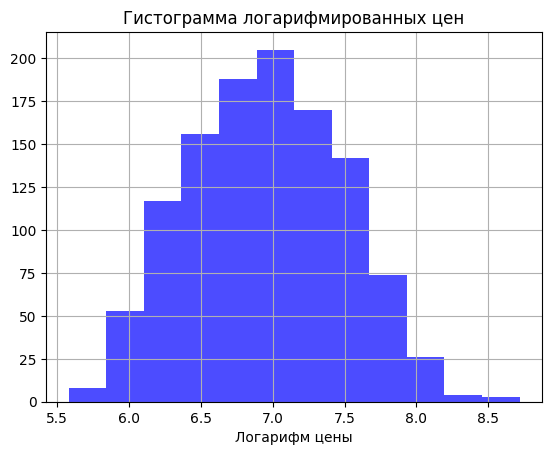

In [48]:
plt.hist(df['log_Price_euros'], bins=12, color='blue', alpha=0.7)
plt.title('Гистограмма логарифмированных цен')
plt.xlabel('Логарифм цены')
plt.grid()
plt.show()

Как видим, распределение близко к нормальному.

### Удаление выбросов

##### Метод 1.5IQR

Для начала рассмотрим метод 1.5IQR

In [49]:
Q1 = df['log_Price_euros'].quantile(0.25)
Q3 = df['log_Price_euros'].quantile(0.75)
IQR = Q3 - Q1
low1 = Q1 - 1.5 * IQR
up1 = Q3 + 1.5 * IQR

# Удаляем строки с выбросами
df_cleaned_IQR = df[(df['log_Price_euros'] >= low1) & (df['log_Price_euros'] <= up1)]

# Сколько выбросов?
df[(df['log_Price_euros']< low1) | (df['log_Price_euros']>up1)].shape[0]

2

In [50]:
df_cleaned_IQR

,Company,Product,TypeName,Inches,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted,ScreenResolution_pro,SSD_and_HDD,SSD_or_HDD,Cpu Brand_bin,log_Price_euros
0,HP,250 G6,Notebook,15.6,8,No OS,Intel,Core i5 7200U,2.5,256,0,Intel,HD Graphics 620,575.00,1920x1080,2073600,256,1,0,6.356108
1,Acer,Aspire 3,Notebook,15.6,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,AMD,Radeon R5,400.00,1366x768,1049088,500,0,1,5.993961
2,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,Nvidia,GeForce MX150,1495.00,1920x1080,2073600,512,1,0,7.310550
3,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,Intel,Core i5 8250U,1.6,256,0,Intel,UHD Graphics 620,770.00,1920x1080,2073600,256,1,0,6.647688
4,HP,250 G6,Notebook,15.6,4,No OS,Intel,Core i5 7200U,2.5,0,500,Intel,HD Graphics 620,393.90,1366x768,1049088,500,0,0,5.978633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,8,Linux,Intel,Core i7 7500U,2.7,0,1,AMD,Radeon R5 M430,805.99,1366x768,1049088,1,0,0,6.693311
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,4,Windows 10,Intel,Core i7 6500U,2.5,0,500,Nvidia,GeForce 920M,720.32,1366x768,1049088,500,0,0,6.581083
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,Intel,Core i7 6500U,2.5,128,0,Intel,HD Graphics 520,638.00,1920x1080,2073600,128,1,0,6.459904
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,Intel,Core i7 6500U,2.5,512,0,Intel,HD Graphics 520,1499.00,3200x1800,5760000,512,1,0,7.313220


Используя метод 1.5IQR у нас выделяется всего два выброса.\
Построим ящик с усами:

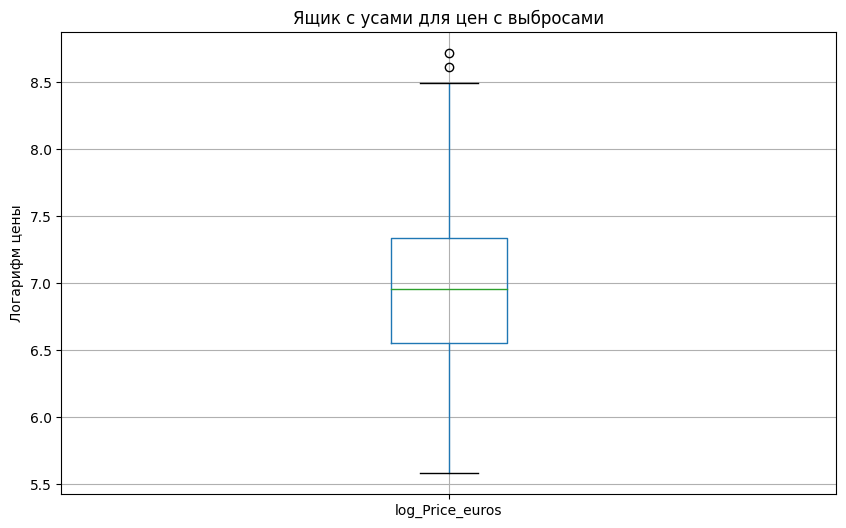

In [51]:
# График с выбросами:
plt.figure(figsize=(10, 6))
df.boxplot(column='log_Price_euros')
plt.title('Ящик с усами для цен с выбросами')
plt.ylabel('Логарифм цены')
plt.show()

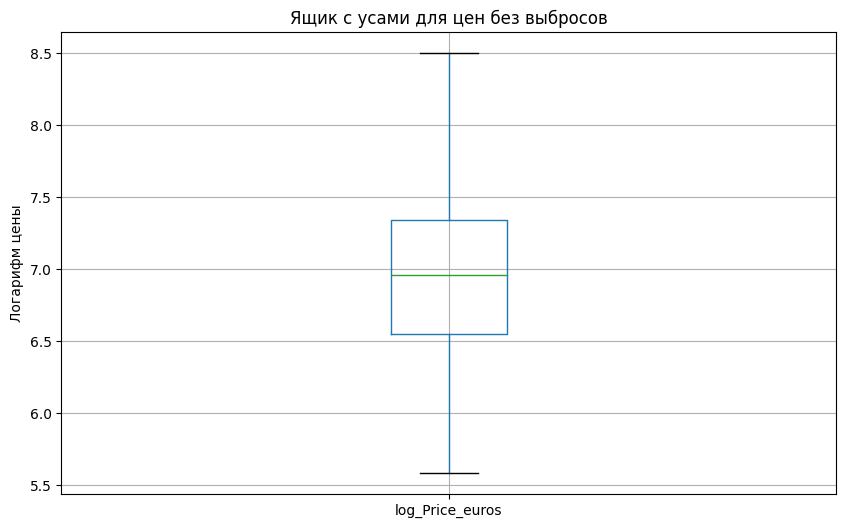

In [52]:
# График без выбросов:
plt.figure(figsize=(10, 6))
df_cleaned_IQR.boxplot(column='log_Price_euros')
plt.title('Ящик с усами для цен без выбросов')
plt.ylabel('Логарифм цены')
plt.show()

##### Метод 3std

Т.к. мы ищем выбросы для логарифмированных цен, т.е. для нормально распределенной переменной, можем попробовать использовать метод 3std

In [53]:
avg = df['log_Price_euros'].mean() # средняя
std = df['log_Price_euros'].std() # стандартное отклонение
low2 = avg-3*std # нижняя граница
up2 = avg+3*std # верхняя граница

# Сколько выбросов?
df[(df['log_Price_euros']<low2) | (df['log_Price_euros']>up2)].shape[0]

2

In [54]:
df_cleaned_3std = df[(df['log_Price_euros'] >= low2) & (df['log_Price_euros'] <= up2)]
df_cleaned_3std

,Company,Product,TypeName,Inches,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,HDD,Gpu Brand,Gpu Model,Price_euros,ScreenResolution_formatted,ScreenResolution_pro,SSD_and_HDD,SSD_or_HDD,Cpu Brand_bin,log_Price_euros
0,HP,250 G6,Notebook,15.6,8,No OS,Intel,Core i5 7200U,2.5,256,0,Intel,HD Graphics 620,575.00,1920x1080,2073600,256,1,0,6.356108
1,Acer,Aspire 3,Notebook,15.6,4,Windows 10,AMD,A9-Series 9420,3.0,0,500,AMD,Radeon R5,400.00,1366x768,1049088,500,0,1,5.993961
2,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,Intel,Core i7 8550U,1.8,512,0,Nvidia,GeForce MX150,1495.00,1920x1080,2073600,512,1,0,7.310550
3,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,Intel,Core i5 8250U,1.6,256,0,Intel,UHD Graphics 620,770.00,1920x1080,2073600,256,1,0,6.647688
4,HP,250 G6,Notebook,15.6,4,No OS,Intel,Core i5 7200U,2.5,0,500,Intel,HD Graphics 620,393.90,1366x768,1049088,500,0,0,5.978633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,Dell,Inspiron 3567,Notebook,15.6,8,Linux,Intel,Core i7 7500U,2.7,0,1,AMD,Radeon R5 M430,805.99,1366x768,1049088,1,0,0,6.693311
1142,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,4,Windows 10,Intel,Core i7 6500U,2.5,0,500,Nvidia,GeForce 920M,720.32,1366x768,1049088,500,0,0,6.581083
1143,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,Intel,Core i7 6500U,2.5,128,0,Intel,HD Graphics 520,638.00,1920x1080,2073600,128,1,0,6.459904
1144,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,Intel,Core i7 6500U,2.5,512,0,Intel,HD Graphics 520,1499.00,3200x1800,5760000,512,1,0,7.313220


Видим, что оба метода дают один и тот же результат - 2 выброса. Проверим, являются ли эти выбросами одинаковыми.

In [55]:
df_outlier_IQR = df[(df['log_Price_euros']< lower_bound) | (df['log_Price_euros']>upper_bound)]
df_outlier_IQR

NameError: name 'lower_bound' is not defined

In [56]:
df_outlier_3std = df[(df['log_Price_euros']<low) | (df['log_Price_euros']>up)]
df_outlier_3std

NameError: name 'low' is not defined

Как видим, оба метода дают нам одни и те же выбросы. В связи с этим делаем вывод, что с учетом логарифмирования цен нам не важно, какой метод нахождения выбросов использовать. Мы будем использовать метод 3х стандартных отклонений, т.к. наше распределение близко к нормальному.

### Описательные статистики

In [58]:

styled_description = df_cleaned_3std.describe(include='all').transpose()

styled_description = styled_description.style.format(precision=2).set_caption("Descriptive Statistics for df_cleaned_3std")

styled_description


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company,1144,17,Dell,284,nan,nan,nan,nan,nan,nan,nan
Product,1144,527,XPS 13,30,nan,nan,nan,nan,nan,nan,nan
TypeName,1144,6,Notebook,626,nan,nan,nan,nan,nan,nan,nan
Inches,1144.00,nan,nan,nan,15.15,1.32,11.30,14.00,15.60,15.60,18.40
Ram,1144.00,nan,nan,nan,8.84,4.99,4.00,6.00,8.00,8.00,64.00
OpSys,1144,7,Windows 10,978,nan,nan,nan,nan,nan,nan,nan
Cpu Brand,1144,2,Intel,1086,nan,nan,nan,nan,nan,nan,nan
Cpu Model,1144,65,Core i5 7200U,193,nan,nan,nan,nan,nan,nan,nan
Cpu Rate,1144.00,nan,nan,nan,2.40,0.41,0.90,2.30,2.50,2.70,3.60
SSD,1144.00,nan,nan,nan,187.59,160.07,0.00,0.00,256.00,256.00,512.00


###

Интерпретация описательных статистик:
1. Количественная переменная — **Price_euros** (Цена в евро):

**Среднее значение**: Средняя цена ноутбуков составляет 1196.85 евро, что говорит о том, что большинство устройств находятся в среднем ценовом сегменте.
Минимальное значение: Самый дешевый ноутбук стоит 265 евро, что, вероятно, соответствует бюджетным моделям.

**Максимальное значение**: Самый дорогой ноутбук стоит 4899 евро, что указывает на премиальные устройства с топовыми характеристиками.

**Интересный факт**: Широкий разброс цен (стандартное отклонение — 649.21 евро) говорит о большом разнообразии устройств в наборе данных, начиная от бюджетных до премиум моделей.

**Медиана**: Медианная цена (1049.43 евро) ниже среднего, что свидетельствует о том, что большинство ноутбуков в выборке имеют цену ниже среднего уровня, и есть несколько дорогих устройств, увеличивающих среднее значение.

2. Категориальная переменная — **Company** (Производитель):

**Частота встречаемости:** Наиболее частый производитель в наборе данных — Dell, с 284 ноутбуками. Это говорит о доминировании Dell в этой выборке.

**Интересный факт:** Несмотря на разнообразие производителей (всего 17 уникальных компаний), одна компания (Dell) составляет почти 25% от всего набора данных. Это может указывать на сильные позиции Dell на рынке ноутбуков или на особенностях выборки.

**Итог:**

Для количественной переменной: Цена варьируется от 265 до 4899 евро, с сильным разбросом в 649.21 евро, что отражает большое разнообразие моделей ноутбуков.

Для категориальной переменной: Dell является доминирующим производителем в данной выборке, что может быть важным при анализе рыночных долей или предпочтений потребителей.

## Корреляция

In [ ]:
df.corr(numeric_only=True)

,Inches,Ram,Cpu Rate,SSD,HDD,Price_euros,ScreenResolution_pro,SSD_and_HDD,SSD_or_HDD,Cpu Brand_bin,log_Price_euros
Inches,1.000000,0.185289,0.232964,-0.248739,0.038344,-0.025176,-0.013635,-0.199621,0.069312,0.129257,-0.113374
Ram,0.185289,1.000000,0.250985,0.412482,-0.274043,0.721824,0.283892,0.154662,0.428796,-0.122961,0.665177
Cpu Rate,0.232964,0.250985,1.000000,0.061605,-0.076061,0.279363,0.035748,-0.006343,0.147947,0.156632,0.265880
SSD,-0.248739,0.412482,0.061605,1.000000,-0.365251,0.491915,0.164998,0.625627,0.501577,-0.119421,0.561684
HDD,0.038344,-0.274043,-0.076061,-0.365251,1.000000,-0.227478,-0.074509,0.497712,-0.407442,0.078463,-0.278510
Price_euros,-0.025176,0.721824,0.279363,0.491915,-0.227478,1.000000,0.370574,0.267694,0.454082,-0.213528,0.942874
ScreenResolution_pro,-0.013635,0.283892,0.035748,0.164998,-0.074509,0.370574,1.000000,0.091291,0.132479,-0.050634,0.299795
SSD_and_HDD,-0.199621,0.154662,-0.006343,0.625627,0.497712,0.267694,0.091291,1.000000,0.125882,-0.045513,0.289932
SSD_or_HDD,0.069312,0.428796,0.147947,0.501577,-0.407442,0.454082,0.132479,0.125882,1.000000,-0.079801,0.529795
Cpu Brand_bin,0.129257,-0.122961,0.156632,-0.119421,0.078463,-0.213528,-0.050634,-0.045513,-0.079801,1.000000,-0.301490


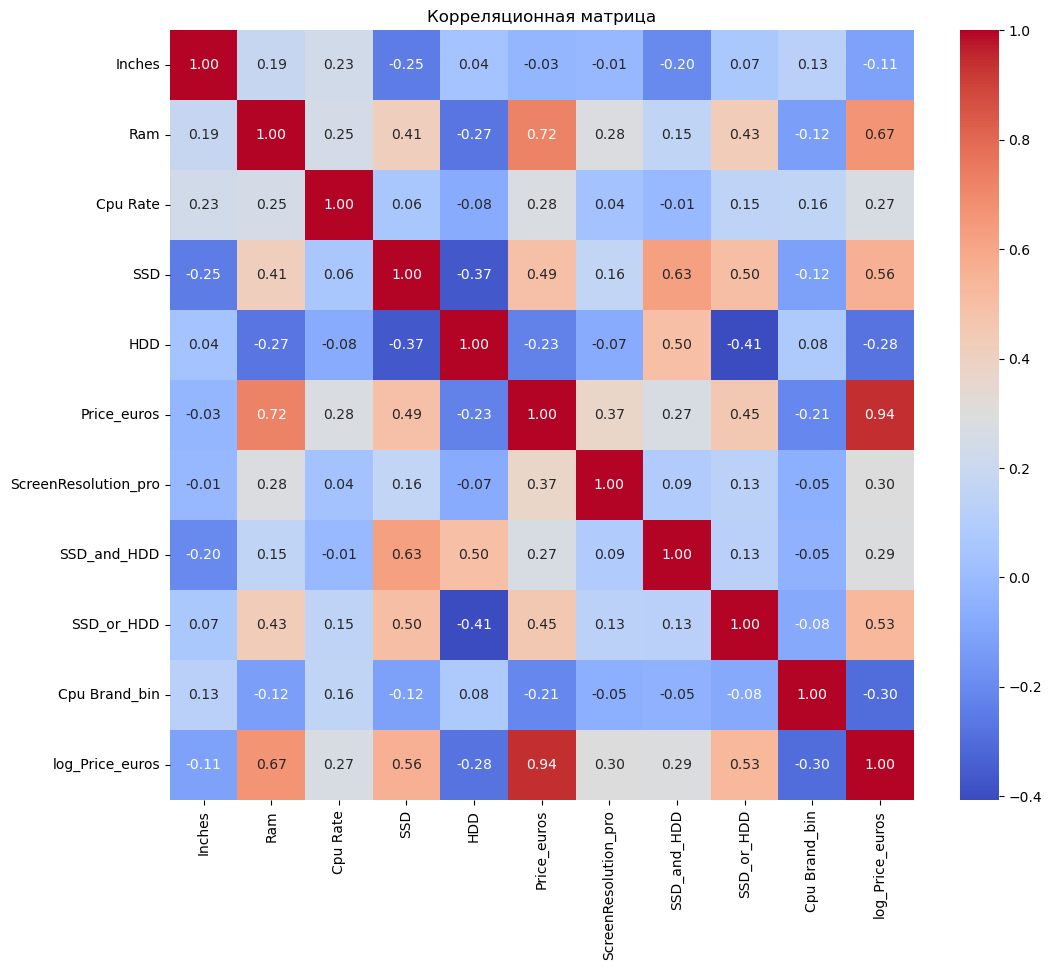

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

# Визуализация корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

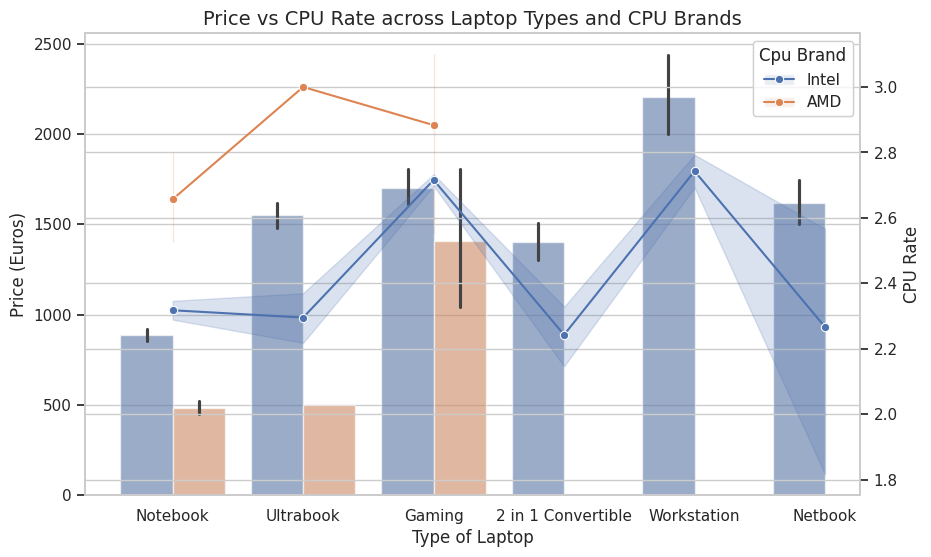

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(10, 6))

# Группируем данные по типу ноутбука и строим столбцы для цены
sns.barplot(x='TypeName', y='Price_euros', hue='Cpu Brand', data=df_cleaned_3std, ax=ax1, alpha=0.6)

ax2 = ax1.twinx()

# Отображаем линии для частоты процессора (CPU Rate)
sns.lineplot(x='TypeName', y='Cpu Rate', hue='Cpu Brand', marker='o', data=df_cleaned_3std, ax=ax2)

ax1.set_ylabel('Price (Euros)', fontsize=12)
ax2.set_ylabel('CPU Rate', fontsize=12)
ax1.set_xlabel('Type of Laptop', fontsize=12)

plt.title('Price vs CPU Rate across Laptop Types and CPU Brands', fontsize=14)

plt.show()


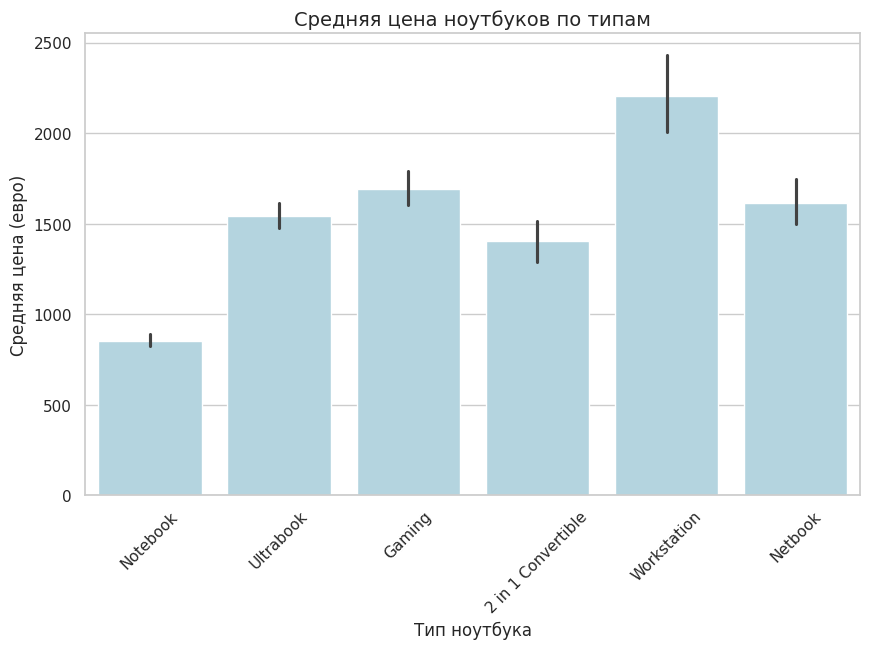

In [60]:

sns.set(style="whitegrid")

# Создаем график - средняя цена ноутбуков по категориям TypeName (тип ноутбука)
plt.figure(figsize=(10, 6))
sns.barplot(x='TypeName', y='Price_euros', data=df_cleaned_3std, color='lightblue')


plt.xlabel('Тип ноутбука', fontsize=12)
plt.ylabel('Средняя цена (евро)', fontsize=12)
plt.title('Средняя цена ноутбуков по типам', fontsize=14)
plt.xticks(rotation=45)

plt.show()
